<a href="https://colab.research.google.com/github/JaimeBaez71/Valores-At-picos/blob/main/Actividad_Valores_Atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving Ventas_totales.csv to Ventas_totales.csv


{'Ventas_totales.csv': b'indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\r\n01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\r\n01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288.6951,405

In [ ]:
data = pd.read_csv('Ventas_totales.csv')
data.head(5)

In [4]:
#Realizamos una copia del dataframe
data2=data.copy()

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

indice_tiempo                           0
ventas_precios_corrientes               0
ventas_precios_constantes               0
ventas_totales_canal_venta              0
salon_ventas                            6
canales_on_line                         0
ventas_totales_medio_pago               0
efectivo                                0
tarjetas_debito                         1
tarjetas_credito                        7
otros_medios                            1
ventas_totales_grupo_articulos          0
subtotal_ventas_alimentos_bebidas      10
bebidas                                 1
almacen                                 2
panaderia                               1
lacteos                                 1
carnes                                  1
verduleria_fruteria                     1
alimentos_preparados_rotiseria          1
articulos_limpieza_perfumeria           0
indumentaria_calzado_textiles_hogar     2
electronicos_articulos_hogar            3
otros                             

Reemplazar Valores Nulos

In [8]:
#Susituir valores nulos con promedio
data2["salon_ventas"]=data2["salon_ventas"].fillna(round(data["salon_ventas"].mean(),1))
data2["tarjetas_debito"]=data2["tarjetas_debito"].fillna(round(data["tarjetas_debito"].mean(),1))
data2["tarjetas_credito"]=data2["tarjetas_credito"].fillna(round(data["tarjetas_credito"].mean(),1))
data2["otros_medios"]=data2["otros_medios"].fillna(round(data["otros_medios"].mean(),1))
data2["subtotal_ventas_alimentos_bebidas"]=data2["subtotal_ventas_alimentos_bebidas"].fillna(round(data["subtotal_ventas_alimentos_bebidas"].mean(),1))
data2["bebidas"]=data2["bebidas"].fillna(round(data["bebidas"].mean(),1))
data2["almacen"]=data2["almacen"].fillna(round(data["almacen"].mean(),1))
data2["panaderia"]=data2["panaderia"].fillna(round(data["panaderia"].mean(),1))
#Susituir valores nulos con mediana
data2["lacteos"]=data2["lacteos"].fillna(round(data["lacteos"].median(),1))
data2["carnes"]=data2["carnes"].fillna(round(data["carnes"].median(),1))
data2["verduleria_fruteria"]=data2["verduleria_fruteria"].fillna(round(data["verduleria_fruteria"].median(),1))
data2["alimentos_preparados_rotiseria"]=data2["alimentos_preparados_rotiseria"].fillna(round(data["alimentos_preparados_rotiseria"].median(),1))
data2["indumentaria_calzado_textiles_hogar"]=data2["indumentaria_calzado_textiles_hogar"].fillna(round(data["indumentaria_calzado_textiles_hogar"].median(),1))
data2["electronicos_articulos_hogar"]=data2["electronicos_articulos_hogar"].fillna(round(data["electronicos_articulos_hogar"].median(),1))
data2["otros"]=data2["otros"].fillna(round(data["otros"].median(),1))

In [ ]:
valores_nulos=data2.isnull().sum()
valores_nulos

Separacion del Dataframe (Cualitativos y cuantativos)

In [10]:
#Verificamos información del DataFrame
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0]]
Cualitativas

<Figure size 1500x800 with 0 Axes>

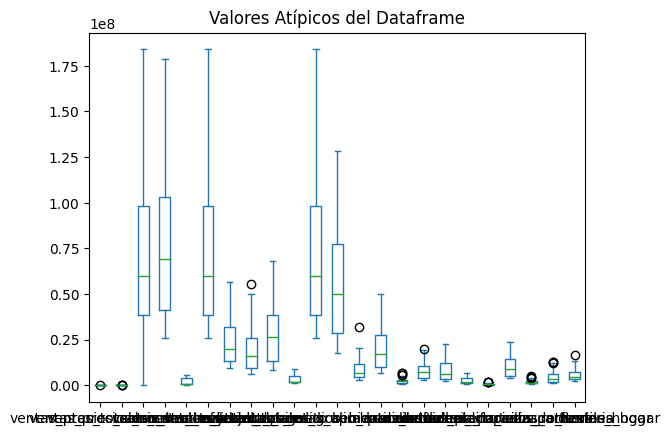

In [29]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [16]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

UNIÓN DE DATAFRAME CUANTITATIVO CON DATAFRAME CUALITATIVO

In [ ]:
Dataframe_final = pd.concat([Cualitativas, data_clean], axis=1)
Dataframe_final

DESCARGA DE DATAFRAME PROCESADO

In [30]:
#Convertir DataFrame a CSV
Dataframe_final.to_csv("Dataframe_sin_Outliers.csv")
from google.colab import files
files.download ("Dataframe_sin_Outliers.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>